In [2]:
import numpy as np
import pandas as pd
from scipy.stats import hypergeom
import scipy.stats as stats
import scipy.special
from scipy.stats import fisher_exact
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
import csv


In [9]:
#Part1
mydata = open("1001958998.csv","r")
dataByLine = csv.reader(mydata,delimiter = ";")

snps = []
temp = True
for line in dataByLine:
    if temp:
        temp = False
        continue

    r = line[0].split(",")

    for x in range(1,5):
        r[x] = int(r[x])

    snps.append(r)

print(snps)


[['snp0', 48, 2, 94, 6], ['snp1', 4, 46, 67, 33], ['snp2', 4, 46, 99, 1], ['snp3', 10, 40, 50, 50], ['snp4', 9, 41, 29, 71], ['snp5', 7, 43, 58, 42], ['snp6', 21, 29, 22, 78], ['snp7', 25, 25, 95, 5], ['snp8', 5, 45, 46, 54], ['snp9', 48, 2, 18, 82], ['snp10', 42, 8, 81, 19], ['snp11', 18, 32, 23, 77], ['snp12', 45, 5, 12, 88], ['snp13', 30, 20, 3, 97], ['snp14', 23, 27, 70, 30], ['snp15', 30, 20, 38, 62], ['snp16', 23, 27, 5, 95], ['snp17', 19, 31, 8, 92], ['snp18', 29, 21, 20, 80], ['snp19', 34, 16, 63, 37], ['snp20', 48, 2, 4, 96], ['snp21', 1, 49, 48, 52], ['snp22', 17, 33, 74, 26], ['snp23', 46, 4, 57, 43], ['snp24', 10, 40, 62, 38], ['snp25', 33, 17, 38, 62], ['snp26', 1, 49, 51, 49], ['snp27', 20, 30, 61, 39], ['snp28', 42, 8, 99, 1], ['snp29', 41, 9, 3, 97], ['snp30', 18, 32, 28, 72], ['snp31', 13, 37, 62, 38], ['snp32', 24, 26, 15, 85], ['snp33', 28, 22, 57, 43], ['snp34', 46, 4, 64, 36], ['snp35', 15, 35, 73, 27], ['snp36', 38, 12, 25, 75], ['snp37', 39, 11, 59, 41], ['snp38'

In [4]:
# Part 2 & Part 3
# contengency table

outputFile = open('results.csv', 'w+')
outputHook = csv.writer(outputFile)

plot = [[],[]]
x = 1

significant_pValue = 0
rectified_pValue = 0

for snp in dataStore:
    table = np.array([[snp[1], snp[2]], [snp[3], snp[4]]])

    operation , pValue = fisher_exact(table, alternative= "two-sided")

    eff_pValue = 5 * (10 ** (-8))
    rectified_pValue = eff_pValue / 1000

    if pValue <= eff_pValue:
        significant_pValue += 1
        if pValue <= significant_pValue:
            rectified_pValue  += 1

    outputHook.writerow([pValue, pValue <= eff_pValue, pValue <= rectified_pValue])
    
    plot[0].append(x)
    x += 1
    plot[1].append(-np.log10(pValue))

outputFile.close()

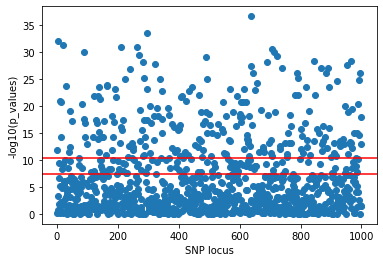

In [10]:
#Part 4

plt.axhline(y=-np.log10(5*(10**(-11))), color='r', linestyle='-') 
plt.axhline(y=-np.log10(5*(10**(-8))), color='r', linestyle='-')
plt.scatter(plot[0], plot[1])

plt.xlabel("SNP locus")
plt.ylabel("-log10(p_values)")

plt.show()